## Task 1

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#request sent with correct encoding
url = "https://books.toscrape.com/catalogue/page-1.html"
response = requests.get(url)
response.encoding = 'utf-8'  # Force correct decoding
soup = BeautifulSoup(response.text, 'html.parser')

#data extracted
books = soup.find_all('article', class_='product_pod')

titles, prices, availability = [], [], []

for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text.strip()
    stock = book.find('p', class_='instock availability').text.strip()

    titles.append(title)
    prices.append(price)
    availability.append(stock)

df = pd.DataFrame({
    'Title': titles,
    'Price': prices,
    'Availability': availability
})

#any non-numeric characters (like £, Â, etc.) removed
df['Price'] = df['Price'].str.replace(r'[^\d.]', '', regex=True).astype(float)

df.to_csv('books_dataset.csv', index=False, encoding='utf-8-sig')

print("Data Extracted and Cleaned Successfully\n")
print(df.head())


Data Extracted and Cleaned Successfully

                                   Title  Price Availability
0                   A Light in the Attic  51.77     In stock
1                     Tipping the Velvet  53.74     In stock
2                             Soumission  50.10     In stock
3                          Sharp Objects  47.82     In stock
4  Sapiens: A Brief History of Humankind  54.23     In stock


## Task 2

---



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("books_dataset.csv")

print("Dataset Overview:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         20 non-null     object 
 1   Price         20 non-null     float64
 2   Availability  20 non-null     object 
dtypes: float64(1), object(2)
memory usage: 612.0+ bytes
None

First 5 Rows:
                                   Title  Price Availability
0                   A Light in the Attic  51.77     In stock
1                     Tipping the Velvet  53.74     In stock
2                             Soumission  50.10     In stock
3                          Sharp Objects  47.82     In stock
4  Sapiens: A Brief History of Humankind  54.23     In stock


In [6]:

print("\nMissing Values:")
print(df.isnull().sum())#no missing values

print("\nDescriptive Statistics:")
print(df.describe())

duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")#no duplicates


Missing Values:
Title           0
Price           0
Availability    0
dtype: int64

Descriptive Statistics:
           Price
count  20.000000
mean   38.048500
std    15.135231
min    13.990000
25%    22.637500
50%    41.380000
75%    51.865000
max    57.250000

Number of duplicate rows: 0


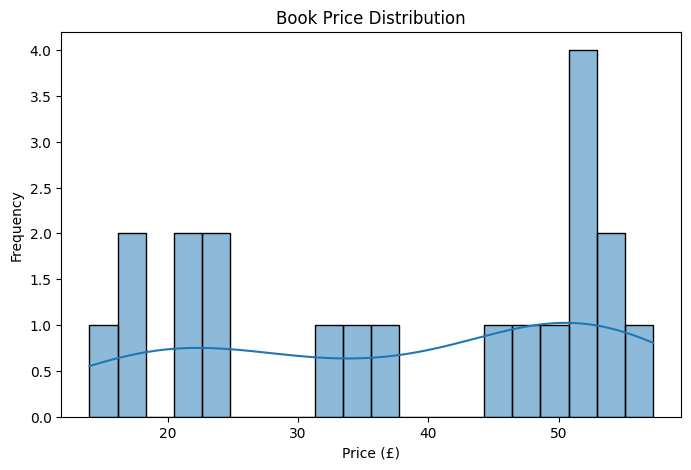

In [7]:
#histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title("Book Price Distribution")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.show()


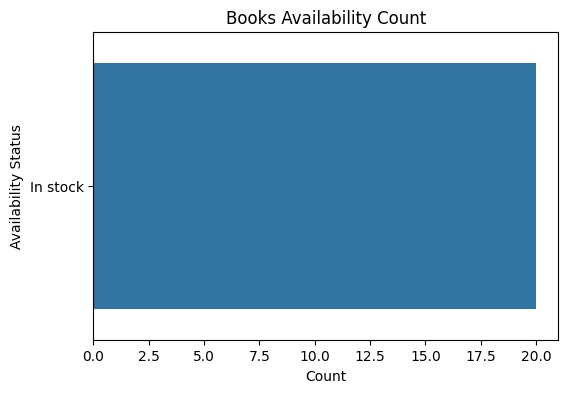

In [8]:
#Count Plot
plt.figure(figsize=(6,4))
sns.countplot(y='Availability', data=df)
plt.title("Books Availability Count")
plt.xlabel("Count")
plt.ylabel("Availability Status")
plt.show()

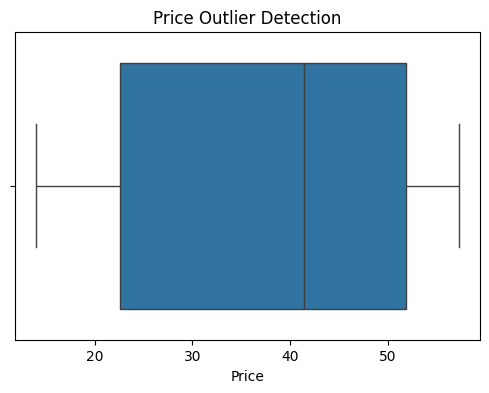

In [9]:
#boxplot to see Outliers
plt.figure(figsize=(6,4))#no outliers
sns.boxplot(x=df['Price'])
plt.title("Price Outlier Detection")
plt.show()



In [10]:
#iqr method for outlier detection
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR))]
print(f"\nNumber of Outliers Detected: {len(outliers)}")


Number of Outliers Detected: 0


In [12]:

print("\nSummary Insights:")
print(f"- Total books analyzed: {len(df)}")
print(f"- Average book price: £{df['Price'].mean():.2f}")
print(f"- Highest priced book: £{df['Price'].max():.2f}")
print(f"- Lowest priced book: £{df['Price'].min():.2f}")



Summary Insights:
- Total books analyzed: 20
- Average book price: £38.05
- Highest priced book: £57.25
- Lowest priced book: £13.99
